# Task 2. Data exploration of the full 995,000_rows dataset

### Data Representation

We have decided to use a pandas dataframe, as it offers many handy in-built functions like reading a .csv file, writing to .csv file, finding all nans etc.

On top of this, a panda dataframe allows us to apply functions to entire columns without explicit loops. This makes the code faster and more efficient, which is important for processing large amounts of data. The trade-off for this is that a panda dataframe takes a larger amount of space. The computer running the code should have at least 8GB of ram.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
file = "../995,000_rows.csv"
df = pd.read_csv(file, usecols=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16])

/tmp/ipykernel_290/4010154515.py:5: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, usecols=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16])


# Data exploration:

### Dataset Problems 

When inspecting the dataset it is clear, that there are alot of missing values (NaN's) in many of the columns; some columns like author and source have a large ratio of empty rows, others keywords and summary are entirely empty. These columns obviously cannot be used as features. Only title has a low ratio of empty rows.

We also discovered that there are data errors in the "type" and "content columns.Some articles have "unknown" as type. Since their type is unknown, we are unable to classify them, making them invalid for training, validating or otherwise. some articles also have invalid data in the "type" column. The distribution of this is explored further down.

Some of the articles also have no content (nan). others are not in english, and are therefore not relevant. For this, all articles with nan, or empty contents before and after processing are removed. This ensures that any article that does not contain any words after cleaning, stemming and stopword removal are removed. This gets rid of articles entirely in foreign languages, and any articles with only stopwords (unlikely).

One thing is clear from this: there is alot of unusable features in the dataset 'Unnamed: 0', 'authors', 'keywords' and more are unusable for a predicting model. There are also many invalid rows that cannot be used for our models, and have to be removed.

In [2]:
df.head(5)

,Unnamed: 0,id,domain,type,url,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,732,7444726.0,nationalreview.com,political,http://www.nationalreview.com/node/152734/%E2%...,2017-11-27T01:14:42.983556,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Iran News Round Up,NaN,NaN,"['National Review', 'National Review Online', ...",NaN,NaN,NaN,NaN
1,1348,6213642.0,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2012/06/the-c...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,The Cost Of The Best Senate Banking Committee ...,NaN,NaN,[''],NaN,NaN,NaN,NaN
2,7119,3867639.0,dailycurrant.com,satire,http://dailycurrant.com/2016/01/18/man-awoken-...,2017-11-27T01:14:21.395055,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Man Awoken From 27-Year Coma Commits Suicide A...,NaN,NaN,[''],NaN,NaN,NaN,NaN
3,1518,9560791.0,nytimes.com,reliable,https://query.nytimes.com/gst/fullpage.html?re...,2018-02-11 00:46:42.632962,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Opening a Gateway for Girls to Enter the Compu...,NaN,NaN,"['Computers and the Internet', 'Women and Girl...",WHEN Julia Geist was asked to draw a picture o...,NaN,NaN,nytimes
4,9345,2059625.0,infiniteunknown.net,conspiracy,http://www.infiniteunknown.net/2011/09/14/100-...,2017-11-10T11:18:44.524042,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,100 Compiled Studies on Vaccine Dangers – Infi...,NaN,NaN,[''],NaN,"Lymphoma, Hepatitis B, Immune System, Health, ...",NaN,NaN


In [3]:
# NaN's
import numpy as np
N = df.shape[0]
print('title NaN ratio:', df['title'].isna().sum() / N)
print('author NaN ratio:', df['authors'].isna().sum() / N)
print('source NaN ratio:', df['source'].isna().sum() / N)
print('keywords NaN ratio:', df['keywords'].isna().sum() / N)

#include empty arrays, as they are essentialy the same as NaN
df['meta_keywords'] = df['meta_keywords'].apply(lambda x: np.nan if x==np.nan or x == '' or x == [''] else x)
print('meta_description NaN/empty ratio:', df['meta_description'].isna().sum() / N)

print('tags NaN ratio:', df['tags'].isna().sum() / N)
print('summary NaN ratio:', df['summary'].isna().sum() / N)



title NaN ratio: 0.00864924623115578
author NaN ratio: 0.4449819095477387
source NaN ratio: 0.7839979899497488
keywords NaN ratio: 1.0
meta_description NaN/empty ratio: 0.5277447236180904
tags NaN ratio: 0.7679206030150754
summary NaN ratio: 1.0


### Dataset distributions

One interesting property is to examine the type distrubution over the dataset, to get a sense of the class balance. As shown, the reliable and political make up around 42 % of the dataset, and the "fake" categories making upt the rest of the 43%. 

Surprisingly articles with NaN, unknown, or other invalid types make up around 15% of the dataset. Printing out the invalid columns, we can see that many of them are domains, with some even being dates or gibberish. Articles with invalid types obviously have to be removed, as this category column dicates wether they are "fake" or "real". Without this column, these articles cannot be used in training, testing, or validation.

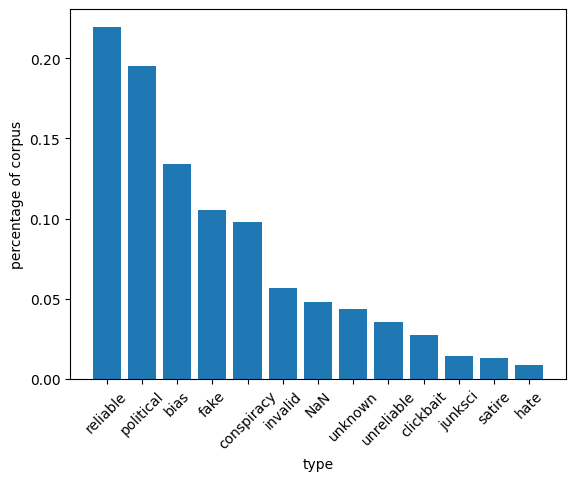

   Unnamed: 0         id            domain   type  \
14       2686  4529818.0     express.co.uk  rumor   
18       7564  4435349.0     express.co.uk  rumor   
23       9987  3771949.0     express.co.uk  rumor   
27       6014  1883076.0  www.ammoland.com    NaN   
29       4659  5887679.0   www.newsmax.com    NaN   
38       4608  6479196.0     express.co.uk  rumor   
43       2397  1511701.0     express.co.uk  rumor   
66        911  1443813.0    www.amazon.com    NaN   
74       6195  1575536.0     express.co.uk  rumor   
75       1106  4958817.0     express.co.uk  rumor   

                                                  url  \
14  https://www.express.co.uk/news/nature/704929/f...   
18  https://www.express.co.uk/videos/get_video_by_...   
23  https://www.express.co.uk/pictures/pics/2179/C...   
27  https://www.ammoland.com/tags/new-jersey-rifle...   
29  https://www.newsmax.com/Newsfront/carrie-fishe...   
38  https://www.express.co.uk/sport/football/79173...   
43  http://www.ex

In [4]:
# Class imbalance plot
valid_types = ['fake', 'satire', 'bias', 'conspiracy', 'state', 'junksci', 'hate', 'clickbait', 'unreliable', 'political', 'reliable','unknown','NaN']
type_series = df["type"].fillna('NaN')  # Fill NaN values with 'NaN'
type_series[type_series == ''] = 'empty'  # Replace empty strings with 'empty'
type_series = type_series.apply(lambda x: x if x in valid_types else 'invalid')  # Replace types not in valid_types with 'invalid'
type_frequency = type_series.value_counts(dropna=False) 
plt.bar(x=type_frequency.keys(), height=list(type_frequency.values/df.shape[0]))            # percentages
# plt.bar(x=type_frequency.keys(), height=list(type_frequency.values))                           # raw values
plt.xticks(rotation=45)
plt.xlabel("type")
plt.ylabel("percentage of corpus")
plt.show()

types_where_condition_true = df[~df['type'].isin(valid_types)]
print(types_where_condition_true.head(10))



Another property is the distrubution over domian. Looking at the distribution of all domains, 17.5% of all articles come from the ny times. 

do some media outlets produce more fake news then others. From the plots below, nytimes, dailykos and nationalreview accounts for around 70% of all real articles, while beforeitwasnews, sputniknews, abovetopsecret, and wikileaks accounts for aorund 40% of all fake ones.

Interestingly, out of the most common 25 of each catgory, there are no websites that appear in both. this suggests that the domain of the article has strong ties to wether it is real or fake.

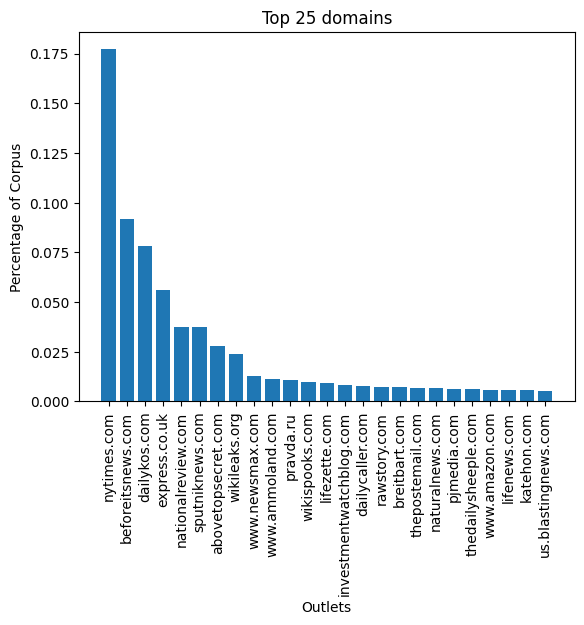

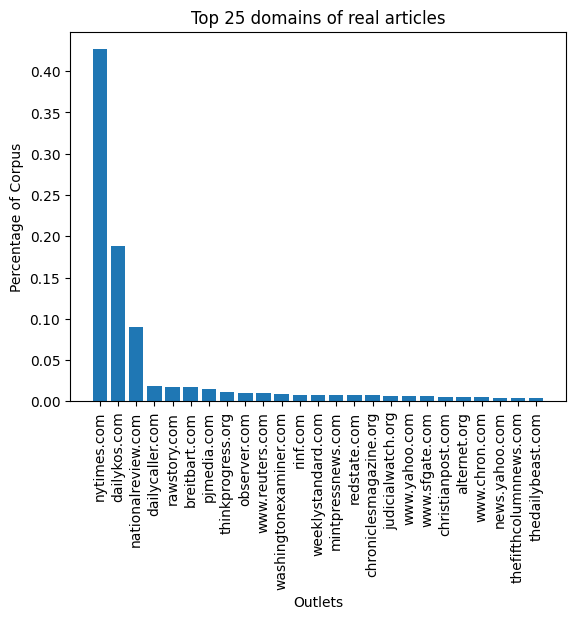

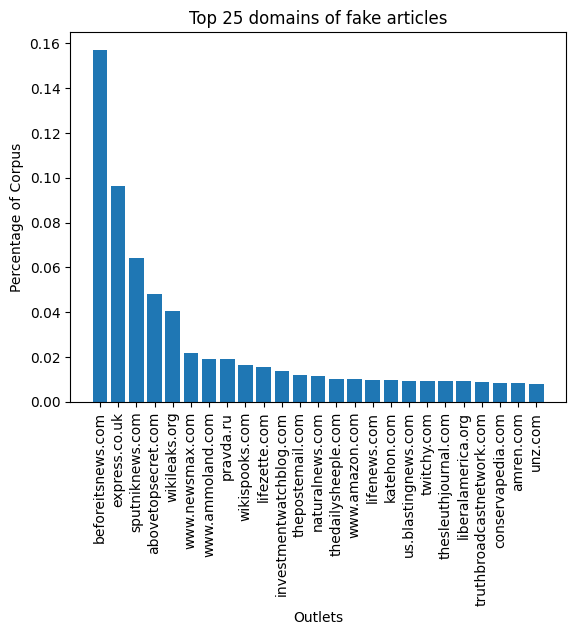

In [5]:
import matplotlib.pyplot as plt

# Distribution over domain
df['type'] = df['type'].apply(lambda x: 'real' if x in ['reliable', 'political'] else 'fake')
freq = df["domain"].value_counts() / df.shape[0]
fake_df = df[df['type'] == 'fake']
freq_fake = fake_df["domain"].value_counts() / fake_df.shape[0]
real_df = df[df['type'] == 'real']
freq_real = real_df["domain"].value_counts() / real_df.shape[0]
# Define the plot_domains function
def plot_domains(freq, title):
    plt.bar(x=freq.keys()[:25], height=list(freq[:25].values))
    plt.xticks(rotation=90)
    plt.xlabel('Outlets')
    plt.ylabel("Percentage of Corpus")
    plt.title(title)
    plt.show()

# Plot the top 25 domains overall
plot_domains(freq, 'Top 25 domains')

# Plot the top 25 domains of real articles
plot_domains(freq_real, 'Top 25 domains of real articles')

# Plot the top 25 domains of fake articles
plot_domains(freq_fake, 'Top 25 domains of fake articles')



# data exploration after preprocessing dataset

This function explores the data from the count() vocabularies returned by the preprocessing pipeline (task 3)


From this, we can see that many rows had to be removed due to invalid types and contents, just short of 20% in fact.

We can also see that the word count of the most common words increase exponentially with rank(most common). We can also see, that after removing stopwords, the terms that are most frequent are removed. Infact, the highest frequency is redued by an order of magnitude, if not counting NUM. This fits zipf's law very well, and effectively removes the "head".

However, looking at the total, real, and fake vocabulary distributions after stemming and stopwords, we can see that placeholders, especially NUM and DATE, are very high in frequency. Therefore, these placeholders can be considered part of the "head" from the zipf's law model. Furthermore, real and fake articles have roughly the same amount of numbers, dates, emails and URLs. these placeholders therefore carry little meaning and are therefore removed later. 

looking at the entire vocabulary distribution after preprocessing, we can see that the vast majority at least 80% of the vocabulary has a frequency of under 10. looking at the top 300,000 words, we can see that only around the top 50,000 gets frequencies of over 100. It is therefore reasonable to set the tail of this vocabulary to be features with frequencies of less than around 10-50. This is relatively conservative, and removes the vast majority of typos, and words that have little meaning.

from the 100 most common words of real and fake articles, we can see that though many words like time, govern, york, work, countri, etc are common in both categories, it seems there are many more words that are "exclusive" to one category, suggesting that the vocabulary may be useful for distinguishing real articles from fake ones.

In [9]:
import pandas as pd
import os
from collections import Counter
import string
import matplotlib.pyplot as plt
import pickle 
def data_preprocessing_statistics(filepath):

    directory, filename = os.path.split(filepath)
    base, ext = os.path.splitext(filename)
    statistics_file_path = os.path.join(directory,f"{base}_statistics.pickle")

    with open(statistics_file_path, 'rb') as f:
        original_vocab = pickle.load(f)
        processed_fake_vocab = pickle.load(f)
        processed_real_vocab = pickle.load(f)
        erronious_type = pickle.load(f)
        erronious_content = pickle.load(f)
     
    processed_vocab = processed_fake_vocab + processed_real_vocab
    #erronious rows removed:
    print(f"\n rows/articles removed due to content being empty, not english, or invalid in other ways: {erronious_content}")
    print(f"rows/articles removed due empty/invalid type: {erronious_type}")
    #calculate and print reduction statistics
    print(f"\n Vocabulary before stemming and removing stopwords:{len(original_vocab)}")
    print(f"Vocabulary after stemming and removing stopwords:{len(processed_vocab)}")
    print(f"Reduction rate of vocabulary size from stemming and removing stopwords: {round(1-len(processed_vocab)/len(original_vocab),2)}")
    #total number of urls, emails and dates in dataset
    print(f"\n Total number of URLs,EMAILs,NUMBERs,and DATEs:" ,sum(processed_vocab[word] for word in processed_vocab if any(char in string.ascii_uppercase for char in word)))
    print(f"Total number of URLs:{processed_vocab['URL']}. Number of URLs in real articles: {processed_real_vocab['URL']}. Number of URLs in fake articles: {processed_fake_vocab['URL']}.")
    print(f"Total number of EMAILs:{processed_vocab['EMAIL']}. Number of EMAILs in real articles: {processed_real_vocab['EMAIL']}. Number of EMAILs in fake articles: {processed_fake_vocab['EMAIL']}.")
    print(f"Total number of NUMBERs:{processed_vocab['NUM']}. Number of NUMBERs in real articles: {processed_real_vocab['NUM']}. Number of NUMBERs in fake articles: {processed_fake_vocab['NUM']}.")
    print(f"Total number of DATEs:{processed_vocab['DATE']}. Number of DATEs in real articles: {processed_real_vocab['DATE']}. Number of DATEs in fake articles: {processed_fake_vocab['DATE']}.")


    #vocabulary distribution plot function
    def plot_vocab_freq(word_freq,show_words, title):
        words = [elm[0] for elm in word_freq]
        freqs = [elm[1] for elm in word_freq]

        plt.figure(figsize=(15,9))
        plt.plot(range(1, len(word_freq) + 1), freqs, marker='o', linestyle='-')
        plt.yscale('log')
        
        if show_words:
            plt.xticks(range(1, len(word_freq) + 1), words, rotation=90)

        plt.xlabel("Words, ranked by frequency")
        plt.ylabel("Frequency")
        plt.title(title)
        plt.tight_layout()
        plt.show()
        
    #outputting vocabulary distributions
    original = original_vocab.most_common()
    processed = processed_vocab.most_common()
    processed_real = processed_real_vocab.most_common()
    processed_fake = processed_fake_vocab.most_common()

    plot_vocab_freq(original[:10000], False,"Distribution of 10000 most frequent words before stemming and removing stopwords")
    plot_vocab_freq(processed[:10000], False,"Vocabulary distribution after stemming and removing stopwords")

    print (f"The 100 most common words after stemming and removing stopwords::", processed[:100])
    print (f"The 100 most common words before stemming and removing stopwords:", original[:100])

    plot_vocab_freq((processed), False,"Distribution of vocabulary after preprocessing")
    plot_vocab_freq((processed[:300000]), False,"Distribution of top 300,000 words after preprocessing")
    print(f"The 150 least common words after preprocessing: {(processed[-150:])}")
    plot_vocab_freq(processed_real[:100], True,"100 most common words in real articles")
    plot_vocab_freq(processed_fake[:100], True,"100 most common words in fake articles")
    return


 rows/articles removed due to content being empty, not english, or invalid in other ways: 1993
rows/articles removed due empty/invalid type: 195530

 Vocabulary before stemming and removing stopwords:1727046
Vocabulary after stemming and removing stopwords:1521461
Reduction rate of vocabulary size from stemming and removing stopwords: 0.12

 Total number of URLs,EMAILs,NUMBERs,and DATEs: 8146344
Total number of URLs:410739. Number of URLs in real articles: 126376. Number of URLs in fake articles: 284363.
Total number of EMAILs:15231. Number of EMAILs in real articles: 6623. Number of EMAILs in fake articles: 8608.
Total number of NUMBERs:7064175. Number of NUMBERs in real articles: 4006456. Number of NUMBERs in fake articles: 3057719.
Total number of DATEs:656199. Number of DATEs in real articles: 309188. Number of DATEs in fake articles: 347011.


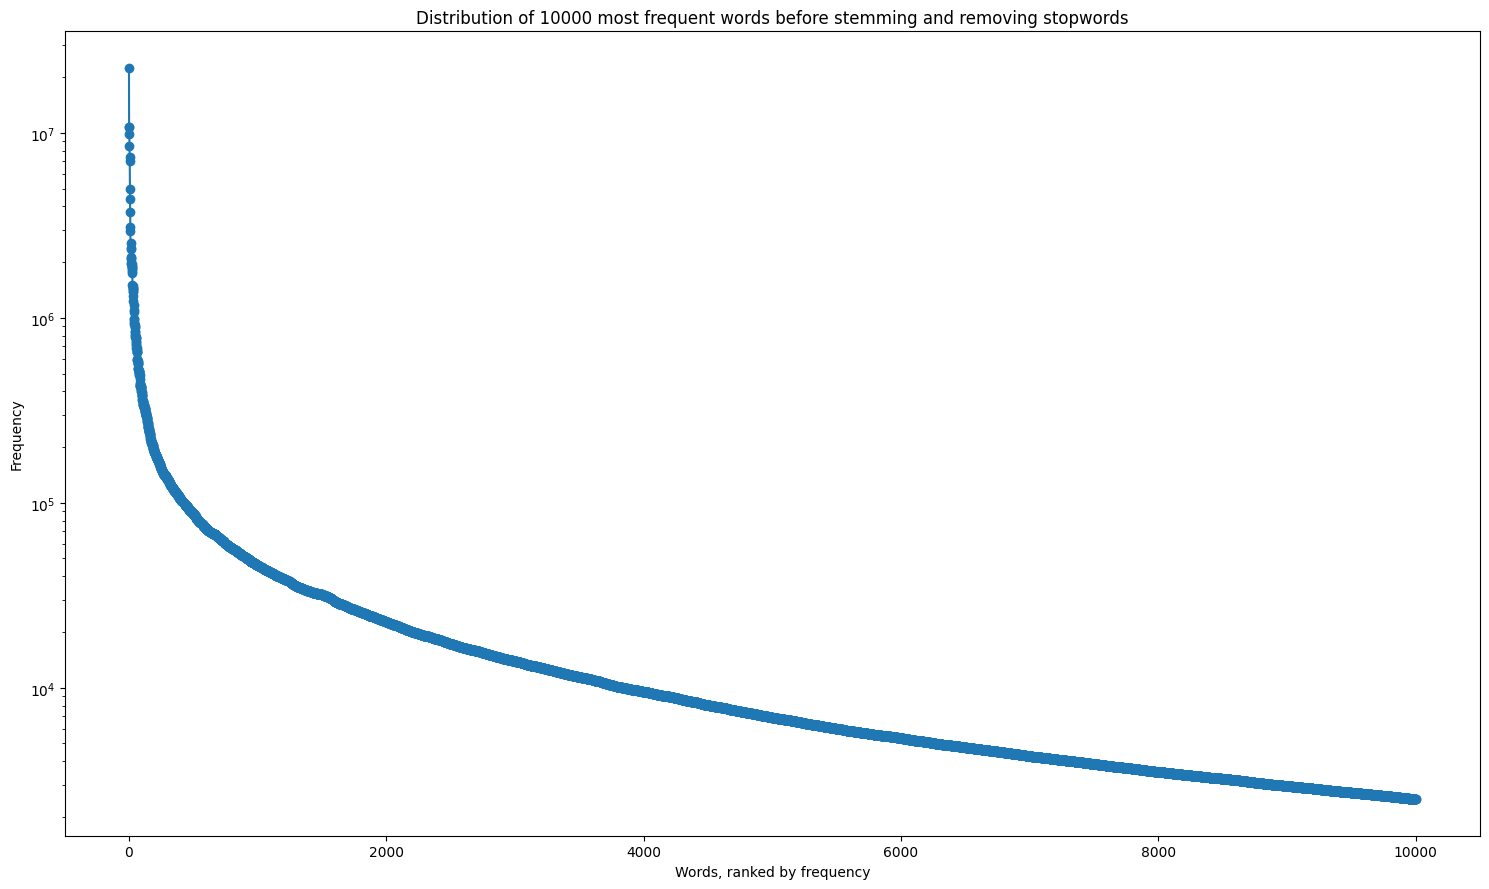

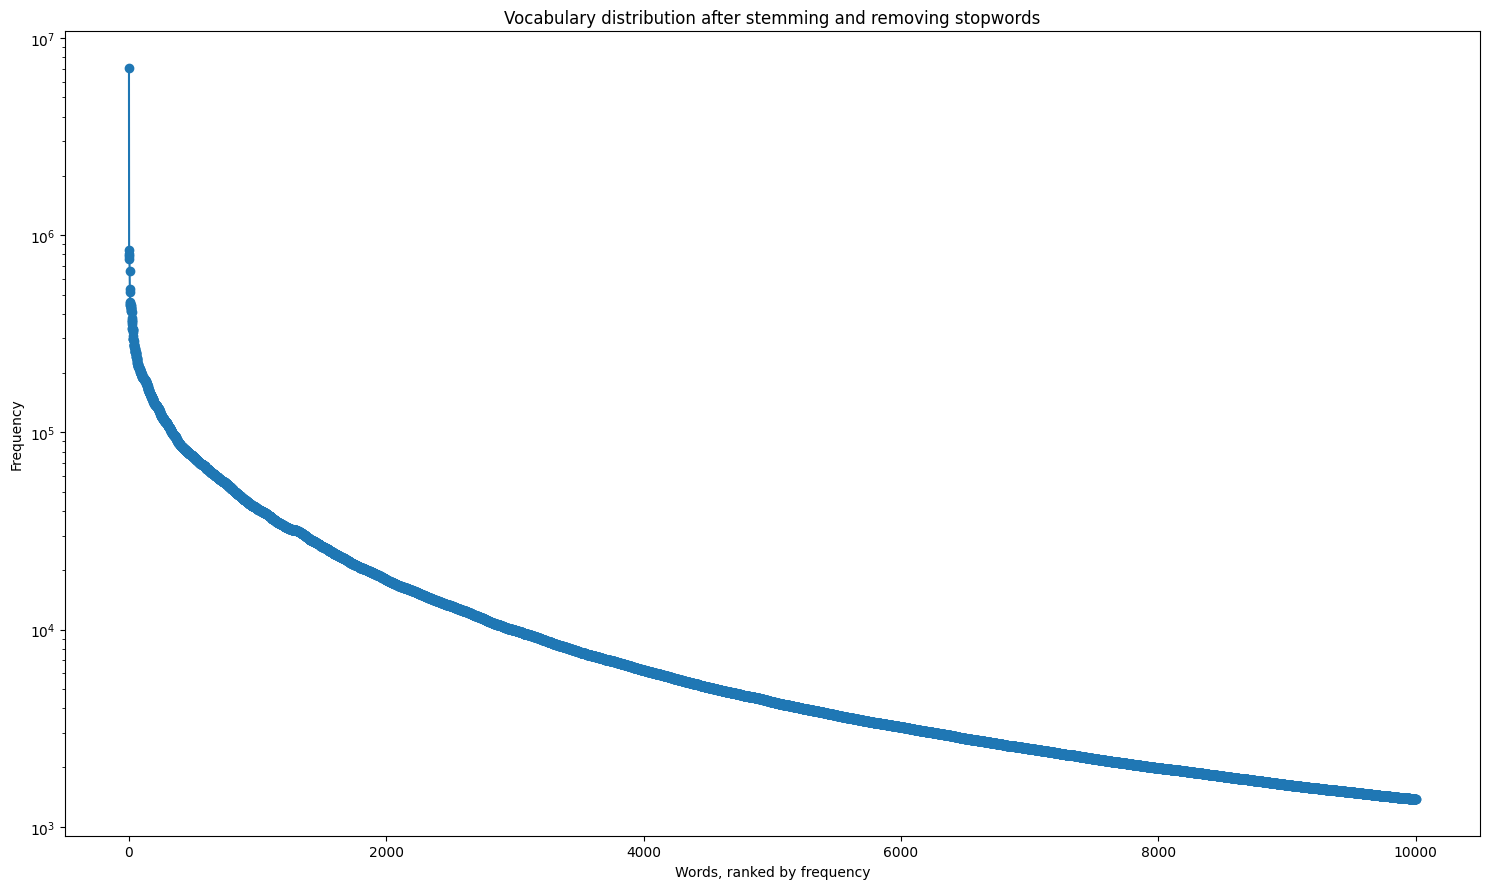

The 100 most common words after stemming and removing stopwords:: [('NUM', 7064175), ('time', 845068), ('state', 803489), ('year', 786784), ('peopl', 756004), ('DATE', 656199), ('make', 530992), ('mr.', 518529), ('report', 459350), ('work', 453357), ('govern', 444888), ('american', 443339), ('presid', 440706), ('news', 439676), ('nation', 428353), ('stori', 426947), ('trump', 425955), ('day', 422986), ('continu', 410958), ('URL', 410739), ('read', 408185), ('world', 382530), ('call', 373533), ('public', 366809), ("n't", 364391), ('includ', 355242), ('iran', 338173), ('back', 335885), ('polit', 333429), ('countri', 331782), ('york', 329152), ('support', 323179), ('obama', 308887), ('war', 299365), ('system', 299209), ('unit', 298471), ('show', 290428), ('hous', 282133), ('thing', 279107), ('live', 277207), ('week', 276533), ('group', 273211), ('u.s.', 270037), ('compani', 268685), ('law', 266364), ('made', 264997), ('republican', 258684), ('main', 257529), ('issu', 257178), ('good', 256

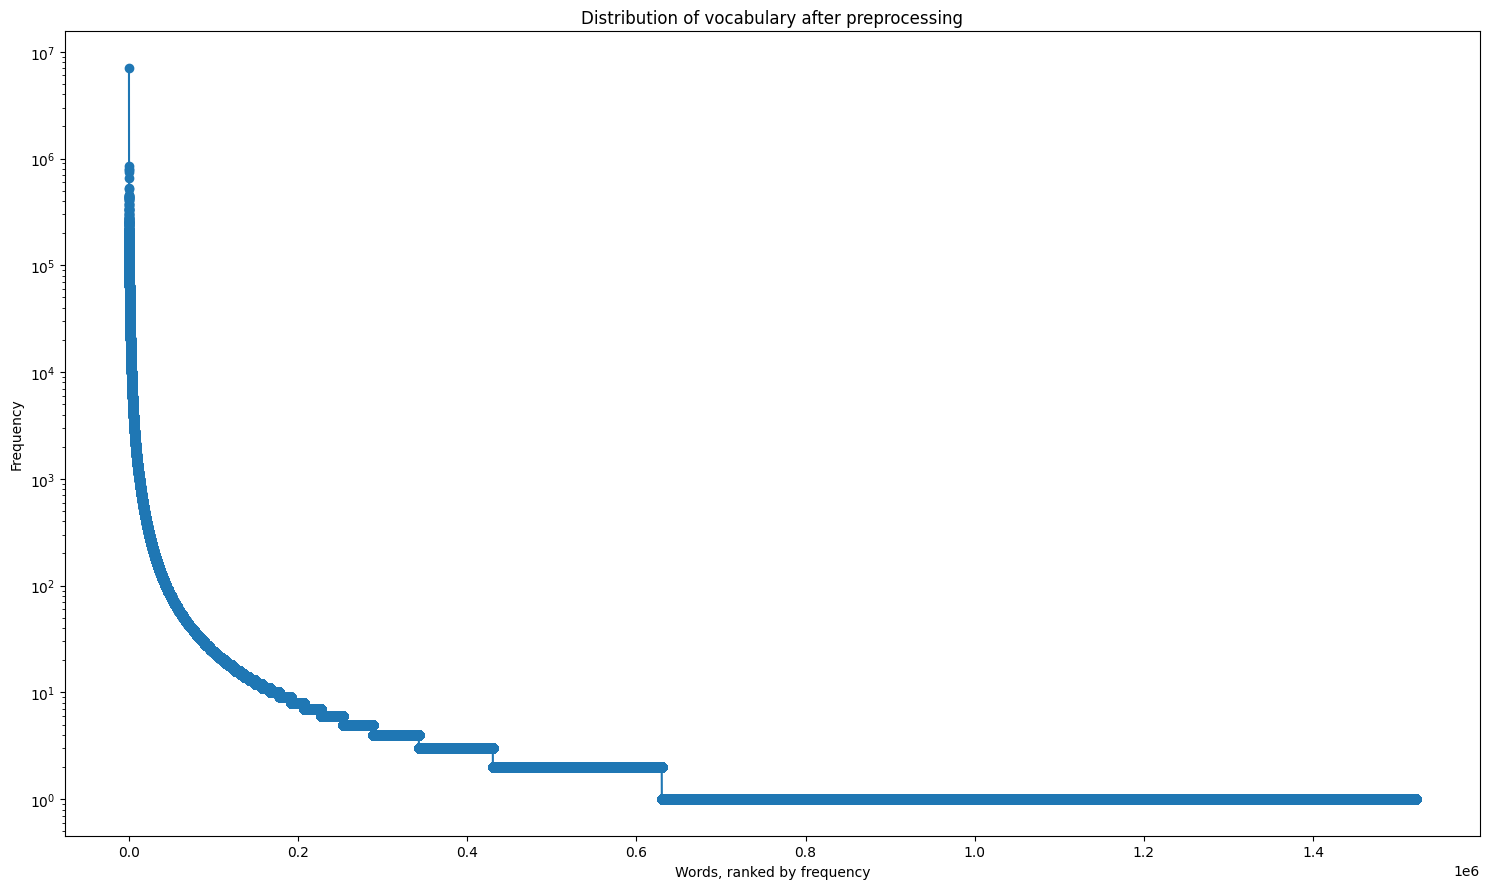

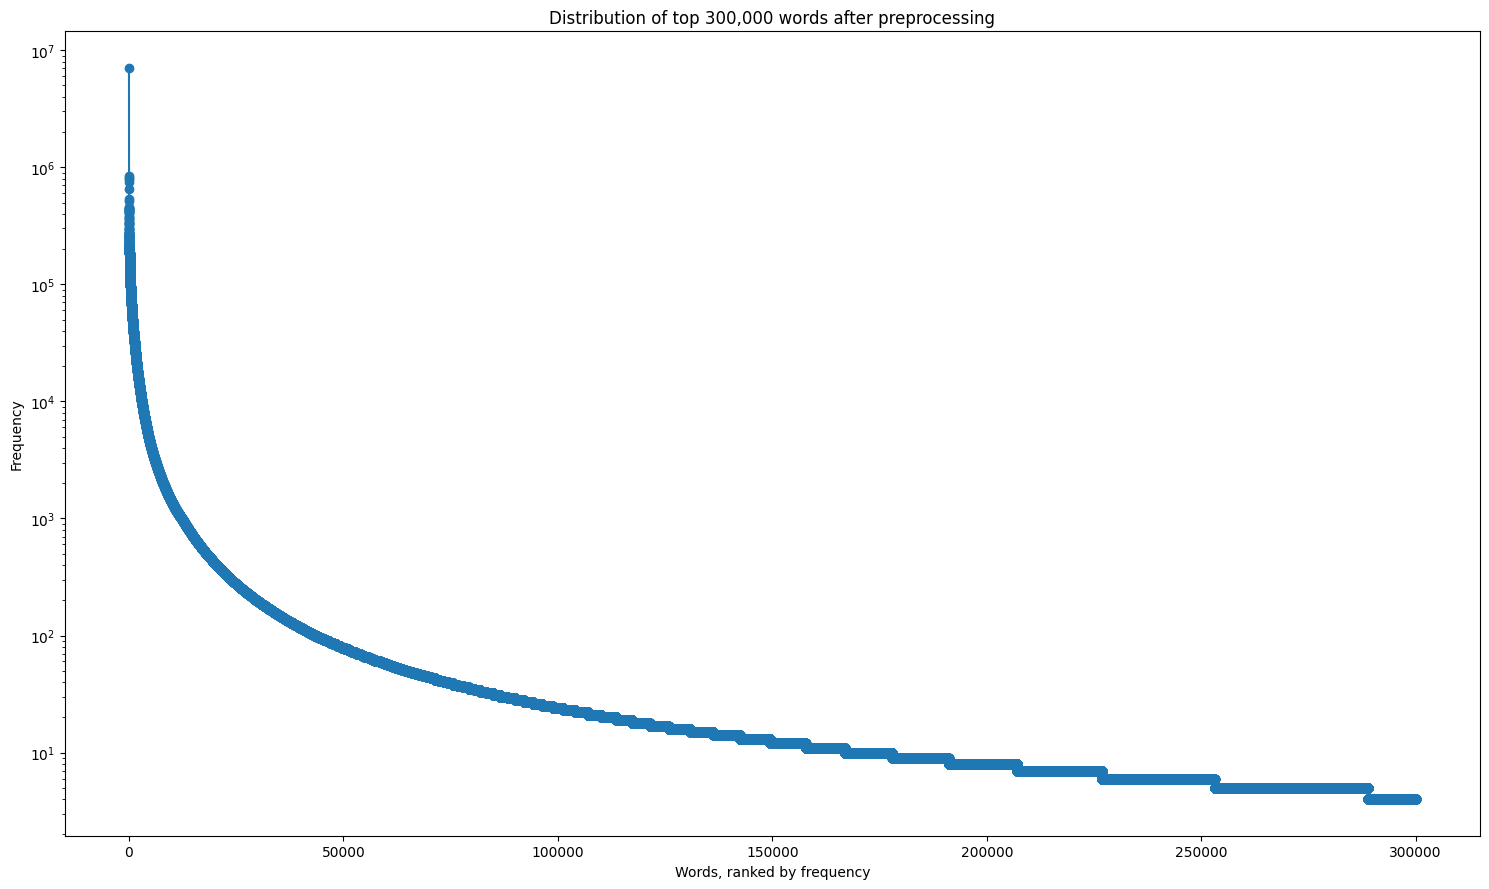

The 150 least common words after preprocessing: [('meng—an', 1), ('challenge—though', 1), ('d/ip', 1), ('d/wf/ip', 1), ('dem/wf', 1), ('d/wf/con', 1), ('r/ip', 1), ('pre-cu', 1), ('middle-sized-ant', 1), ('minimal—you', 1), ('andddd', 1), ('selfless…', 1), ('platt-gordon', 1), ('core-requir', 1), ('cp/cps', 1), ('smime', 1), ('end-ent', 1), ('sec_error_ocsp_unauthorized_request', 1), ('sec_error_ocsp_unauthorized_respons', 1), ('mundomax', 1), ('ancheolog', 1), ('bombic', 1), ('/gma/video/police-officer-leave-video-captures-punching-woman-face-', 1), ('multi-team', 1), ('bird-rel', 1), ('hazyipa', 1), ('newenglendipa', 1), ('citrus-peel', 1), ('hazy-i.p.a', 1), ('nanobreweri', 1), ('tastes-like-juic', 1), ('rittappadu', 1), ('seshayya-siromani', 1), ('mancheri', 1), ('adilabad', 1), ('seshayya', 1), ('jatapu', 1), ('soothikonda', 1), ('hyderabad.', 1), ('thejesvar', 1), ('ankamma', 1), ('zedong…netaji', 1), ('not-so-enthusiast', 1), ('koranna', 1), ('manganna', 1), ('girijan', 1), ('sa

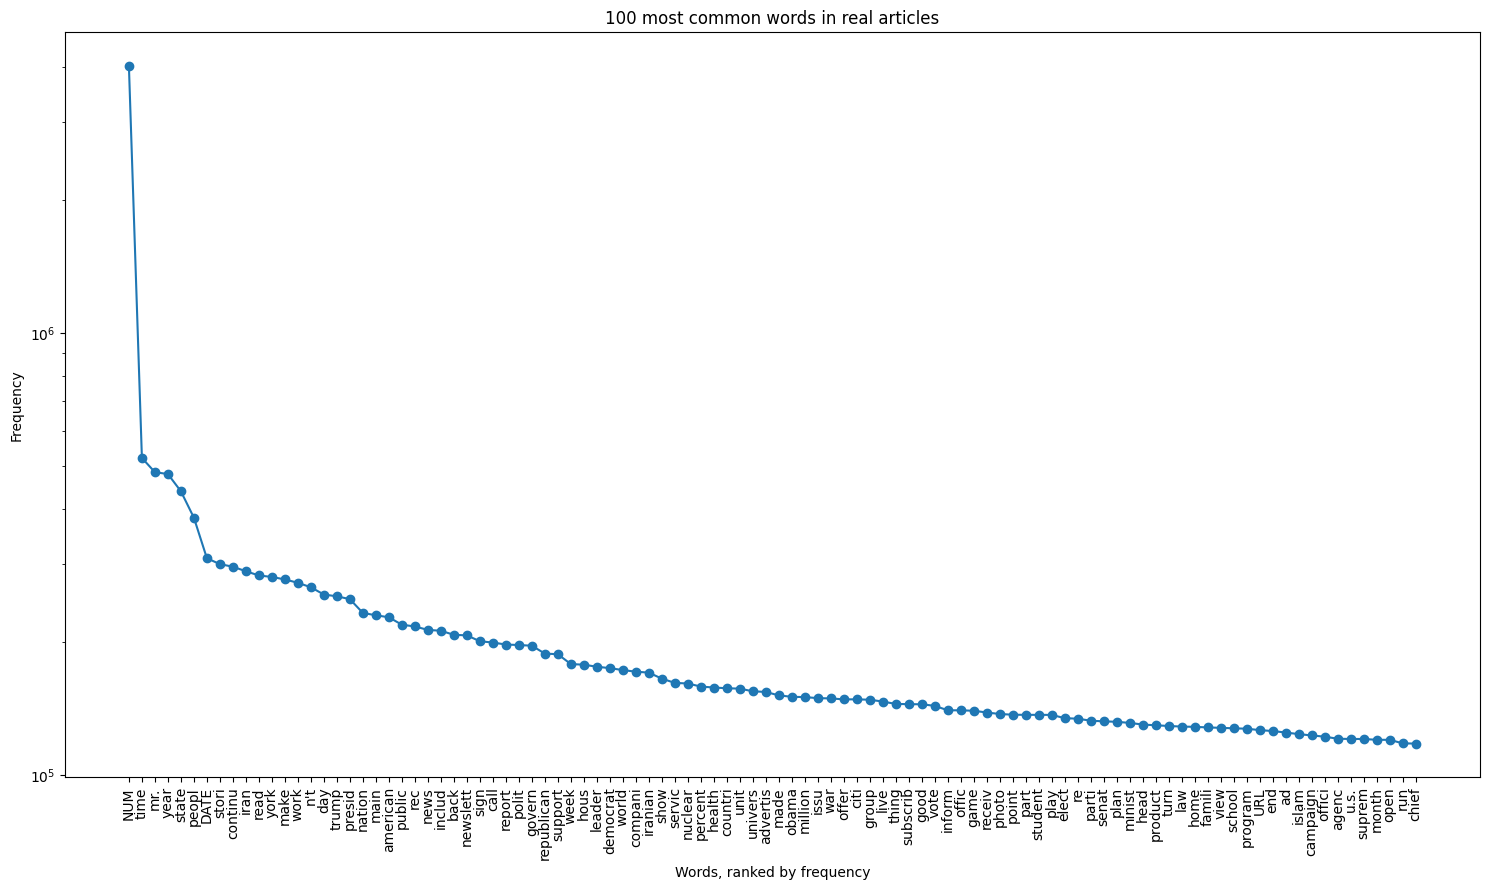

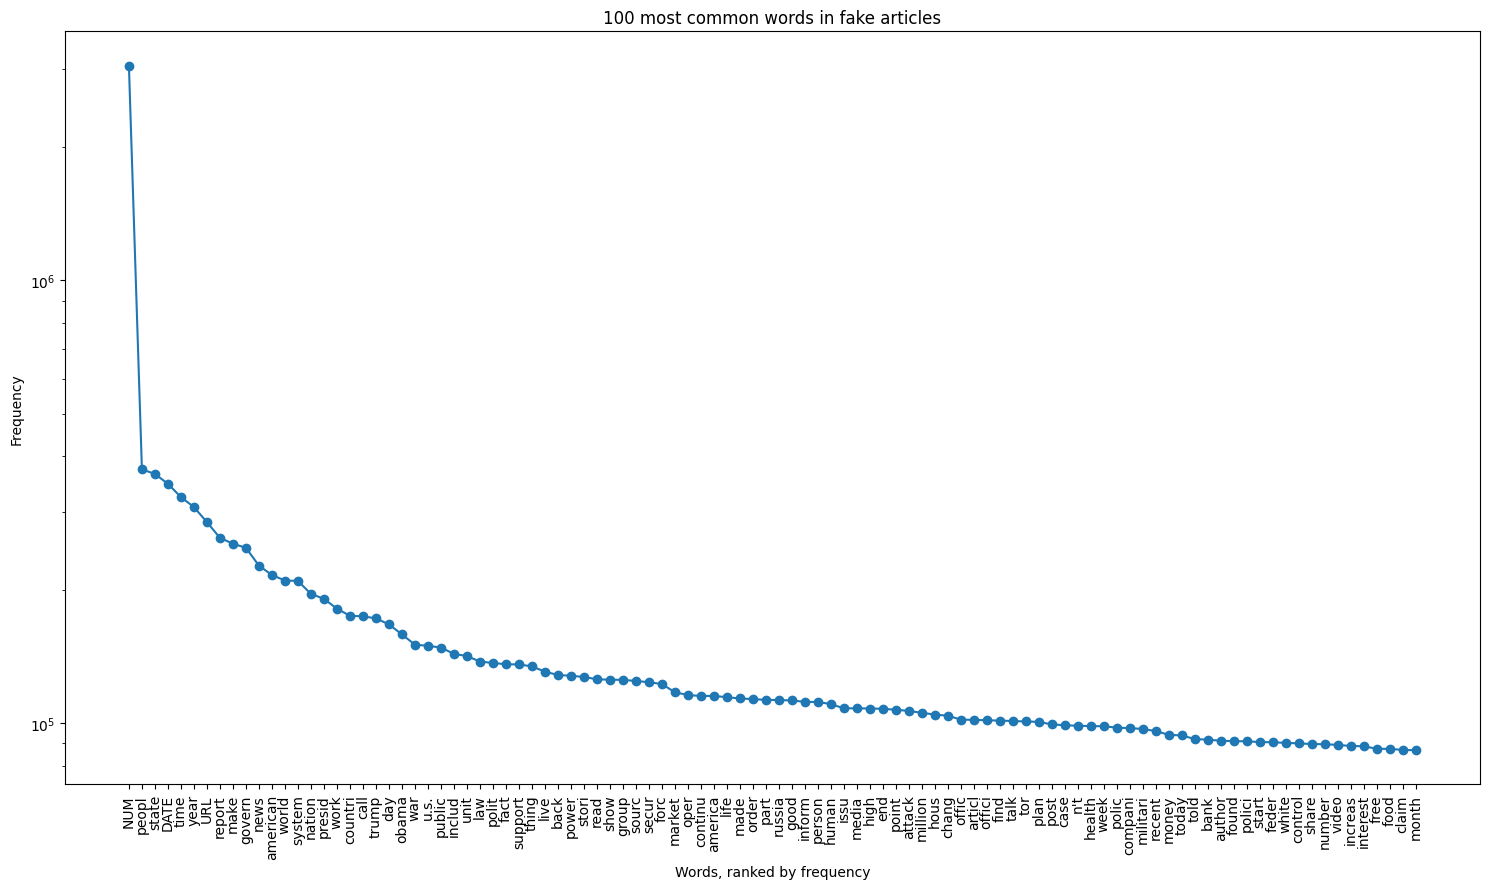

In [10]:
data_preprocessing_statistics("../995,000_rows.csv")